In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv
/content/drive/MyDrive/traffic data/social status merge/Ped_Victims.csv

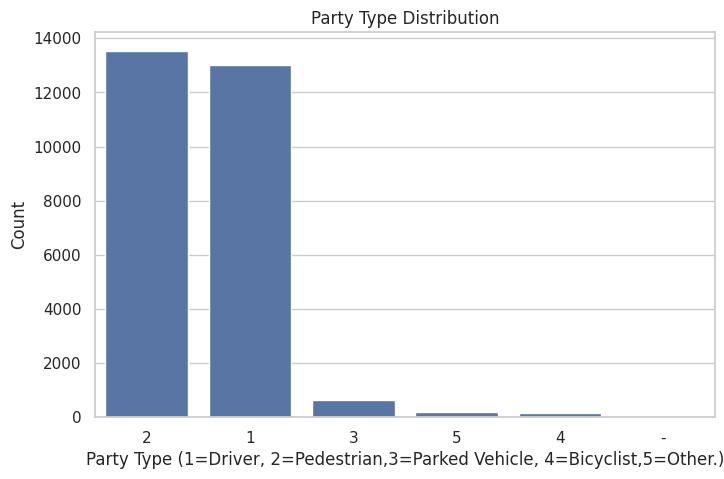

In [8]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Set plot style
sns.set(style="whitegrid")

# 1. Party Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="PARTY_TYPE", data=df, order=df['PARTY_TYPE'].value_counts().index)
plt.title("Party Type Distribution")
plt.xlabel("Party Type (1=Driver, 2=Pedestrian,3=Parked Vehicle, 4=Bicyclist,5=Other.)")
plt.ylabel("Count")
plt.show()




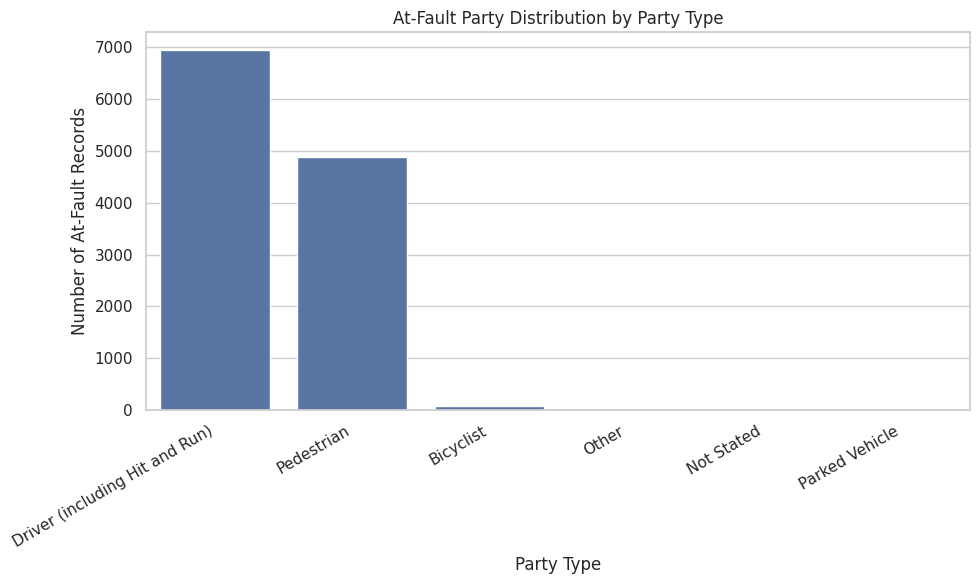

At-Fault Counts by Party Type:

Party Type Label
Driver (including Hit and Run)    6934
Pedestrian                        4872
Bicyclist                           85
Other                               22
Not Stated                          19
Parked Vehicle                       5
Name: count, dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Ensure PARTY_TYPE is numeric
df["PARTY_TYPE"] = pd.to_numeric(df["PARTY_TYPE"], errors="coerce")

# Filter only at-fault records
df_fault = df[df["AT_FAULT"] == "Y"].copy()

# Map PARTY_TYPE to full descriptions
party_type_map = {
    1: "Driver (including Hit and Run)",
    2: "Pedestrian",
    3: "Parked Vehicle",
    4: "Bicyclist",
    5: "Other",
    6: "Operator"
}
df_fault["Party Type Label"] = df_fault["PARTY_TYPE"].map(party_type_map).fillna("Not Stated")

# Plot at-fault distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Party Type Label", data=df_fault, order=df_fault["Party Type Label"].value_counts().index)
plt.title("At-Fault Party Distribution by Party Type")
plt.xlabel("Party Type")
plt.ylabel("Number of At-Fault Records")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Print counts
print("At-Fault Counts by Party Type:\n")
print(df_fault["Party Type Label"].value_counts())


<ipython-input-17-1e8311f2e7fb>:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Party Type", bbox_to_anchor=(1.05, 1), loc="upper left")


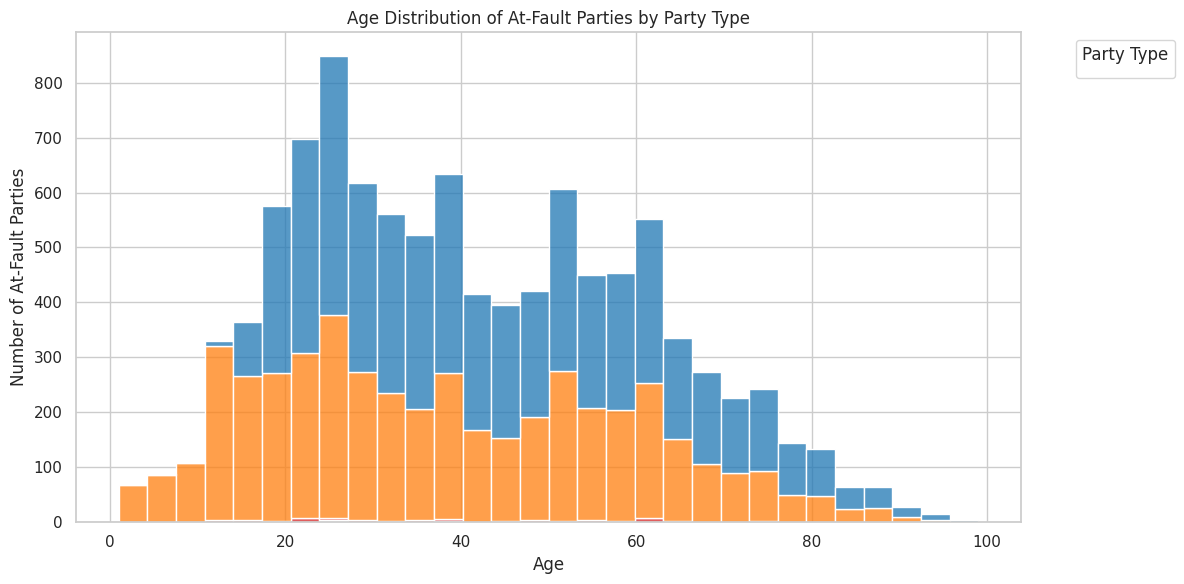

<ipython-input-17-1e8311f2e7fb>:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Party Type", bbox_to_anchor=(1.05, 1), loc="upper left")


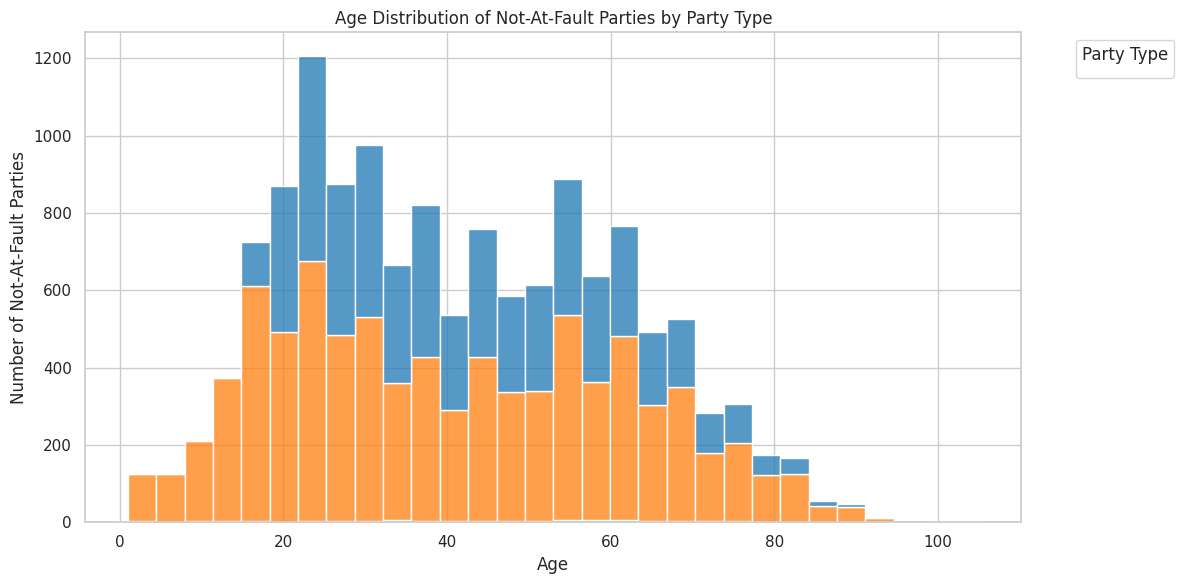

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")
df["PARTY_TYPE"] = pd.to_numeric(df["PARTY_TYPE"], errors="coerce")
df["PARTY_AGE"] = pd.to_numeric(df["PARTY_AGE"], errors="coerce")
df = df[(df["PARTY_AGE"] > 0) & (df["PARTY_AGE"] < 998)]

# Map PARTY_TYPE to readable labels
party_type_map = {
    1: "Driver (including Hit and Run)",
    2: "Pedestrian",
    3: "Parked Vehicle",
    4: "Bicyclist",
    5: "Other",
    6: "Operator"
}
df["Party Type Label"] = df["PARTY_TYPE"].map(party_type_map).fillna("Not Stated")

# Define fixed order and colors
party_order = [
    "Driver (including Hit and Run)",
    "Pedestrian",
    "Parked Vehicle",
    "Bicyclist",
    "Other",
    "Operator",
    "Not Stated"
]
palette = {
    "Driver (including Hit and Run)": "#1f77b4",
    "Pedestrian": "#ff7f0e",
    "Parked Vehicle": "#2ca02c",
    "Bicyclist": "#d62728",
    "Other": "#9467bd",
    "Operator": "#8c564b",
    "Not Stated": "#7f7f7f"
}

# === Plot: At-Fault Age Distribution ===
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df[df["AT_FAULT"] == "Y"],
    x="PARTY_AGE",
    hue="Party Type Label",
    bins=30,
    multiple="stack",
    palette=palette,
    hue_order=party_order
)
plt.title("Age Distribution of At-Fault Parties by Party Type")
plt.xlabel("Age")
plt.ylabel("Number of At-Fault Parties")
plt.legend(title="Party Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# === Plot: Not-At-Fault Age Distribution ===
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df[df["AT_FAULT"] != "Y"],
    x="PARTY_AGE",
    hue="Party Type Label",
    bins=30,
    multiple="stack",
    palette=palette,
    hue_order=party_order
)
plt.title("Age Distribution of Not-At-Fault Parties by Party Type")
plt.xlabel("Age")
plt.ylabel("Number of Not-At-Fault Parties")
plt.legend(title="Party Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



In [22]:
import pandas as pd

# Load data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Filter at-fault only
df_fault = df[df["AT_FAULT"] == "Y"].copy()

# Clean and map race
race_map = {
    "A": "Asian",
    "B": "Black",
    "H": "Hispanic",
    "O": "Other",
    "W": "White",
    "-": "Not Stated",
    "": "Not Stated"
}
df_fault["RACE"] = df_fault["RACE"].fillna("-").astype(str).str.strip()
df_fault["Race Label"] = df_fault["RACE"].map(race_map).fillna("Not Stated")

# Map party type (only keep Drivers and Pedestrians)
party_type_map = {1: "Driver", 2: "Pedestrian"}
df_fault["Party Role"] = df_fault["PARTY_TYPE"].map(party_type_map)
df_fault = df_fault[df_fault["Party Role"].notna()]

# Group by Race and Party Role
grouped = df_fault.groupby(["Race Label", "Party Role"]).size().unstack(fill_value=0)

# Add total column
grouped["Total"] = grouped.sum(axis=1)

# Display final summary
print("At-Fault Party Counts by Race and Role (Driver/Pedestrian):")
print(grouped)




At-Fault Party Counts by Race and Role (Driver/Pedestrian):
Empty DataFrame
Columns: [Total]
Index: []


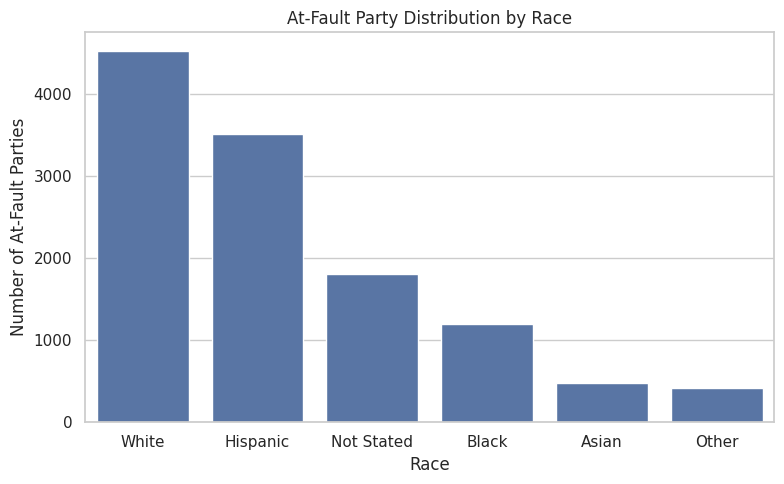

At-Fault Counts by Race:
Race Label
White         4522
Hispanic      3508
Not Stated    1806
Black         1199
Asian          484
Other          418
Name: count, dtype: int64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Filter to only at-fault parties
df_fault = df[df["AT_FAULT"] == "Y"].copy()

# Clean and map race codes to labels
race_map = {
    "A": "Asian",
    "B": "Black",
    "H": "Hispanic",
    "O": "Other",
    "W": "White",
    "-": "Not Stated",
    "": "Not Stated"
}
df_fault["RACE"] = df_fault["RACE"].fillna("-").astype(str).str.strip()
df_fault["Race Label"] = df_fault["RACE"].map(race_map).fillna("Not Stated")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x="Race Label", data=df_fault, order=df_fault["Race Label"].value_counts().index)
plt.title("At-Fault Party Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Number of At-Fault Parties")
plt.tight_layout()
plt.show()

# Print race counts
print("At-Fault Counts by Race:")
print(df_fault["Race Label"].value_counts())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Ensure correct data types
df["PARTY_TYPE"] = pd.to_numeric(df["PARTY_TYPE"], errors="coerce")
df["PARTY_AGE"] = pd.to_numeric(df["PARTY_AGE"], errors="coerce")

# Filter at-fault parties only
df_fault = df[df["AT_FAULT"] == "Y"].copy()

# Drop unknown or invalid ages
df_fault = df_fault[(df_fault["PARTY_AGE"] < 998) & (df_fault["PARTY_AGE"] > 0)]

# Map party types to descriptive labels
party_type_map = {
    1: "Driver (including Hit and Run)",
    2: "Pedestrian",
    3: "Parked Vehicle",
    4: "Bicyclist",
    5: "Other",
    6: "Operator"
}
df_fault["Party Type Label"] = df_fault["PARTY_TYPE"].map(party_type_map).fillna("Not Stated")

# Plot: Age distribution by party type
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_fault,
    x="PARTY_AGE",
    hue="Party Type Label",
    bins=30,
    kde=False,
    multiple="stack"
)
plt.title("Age Distribution of At-Fault Parties by Party Type")
plt.xlabel("Age")
plt.ylabel("Number of At-Fault Parties")
plt.legend(title="Party Type")
plt.tight_layout()
plt.show()


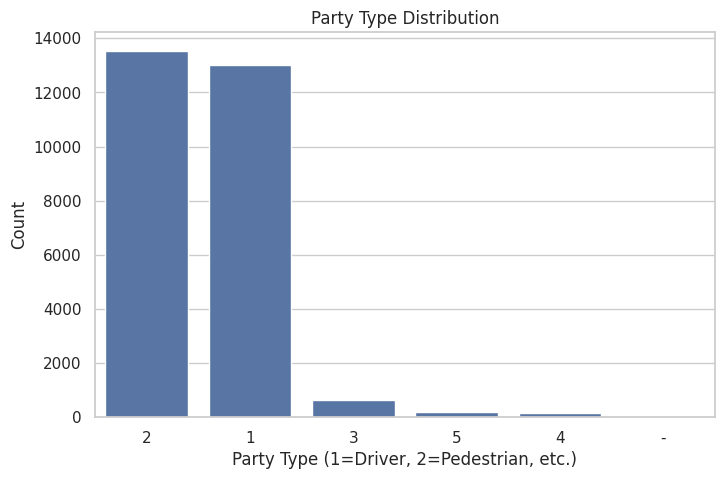

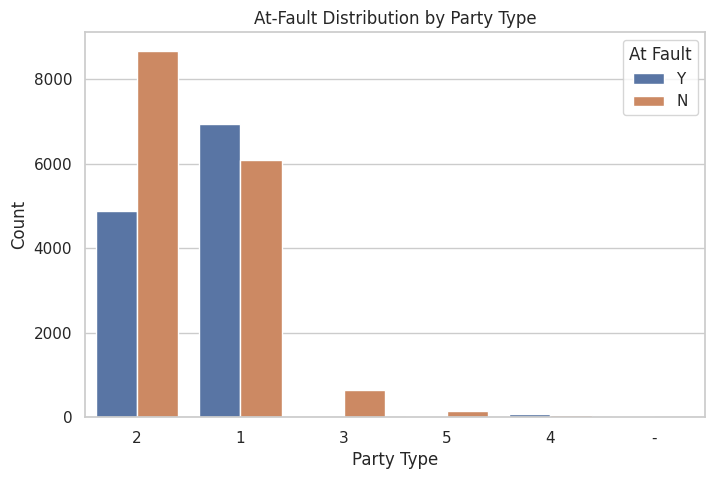

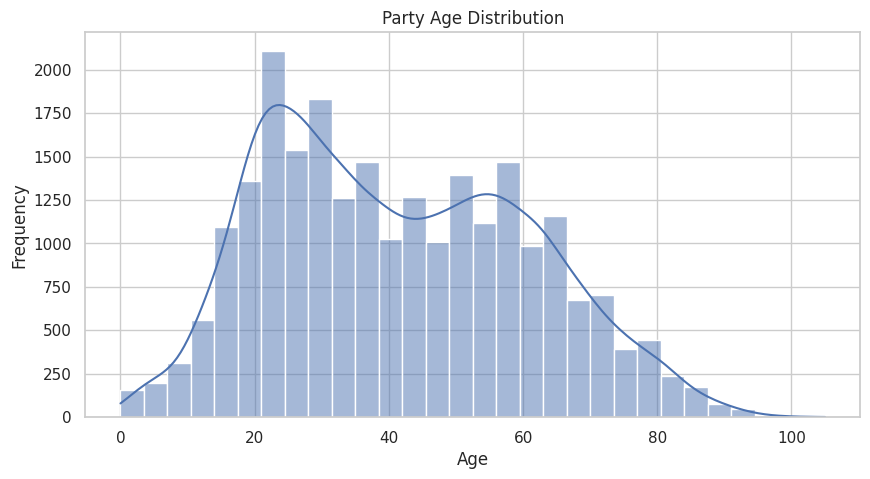

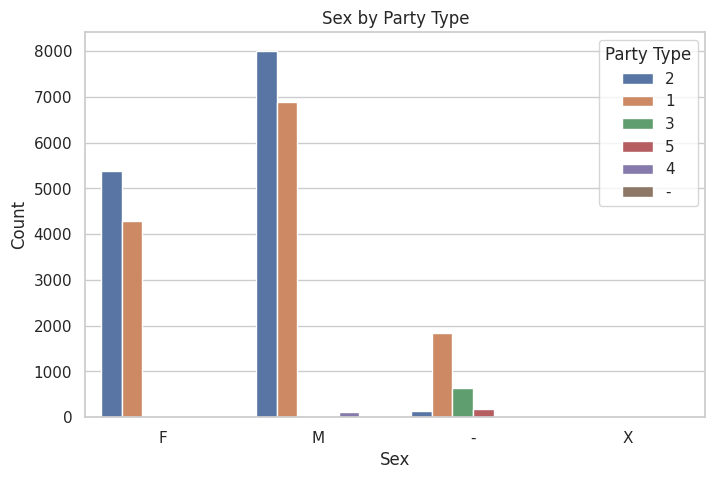

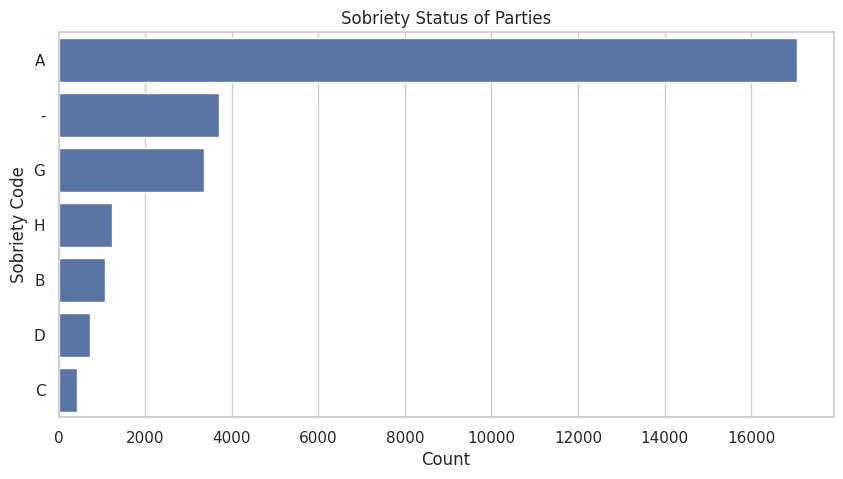

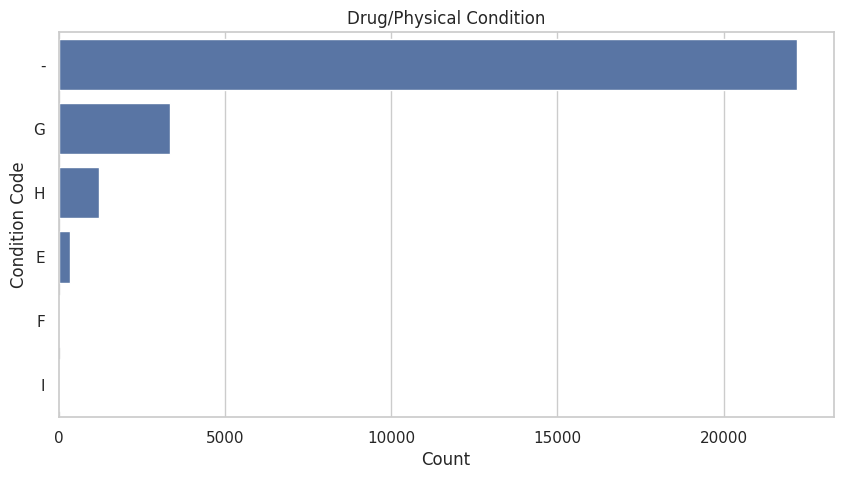

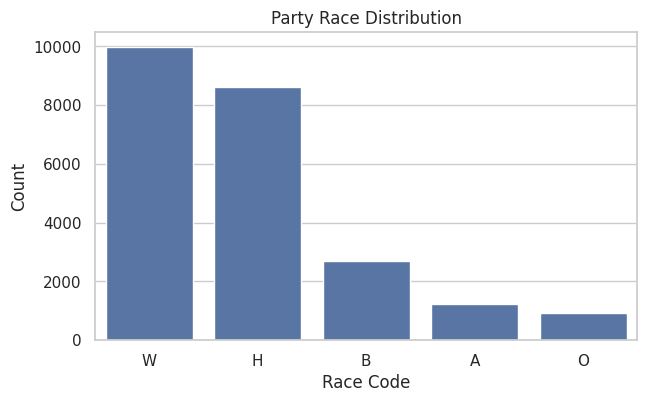

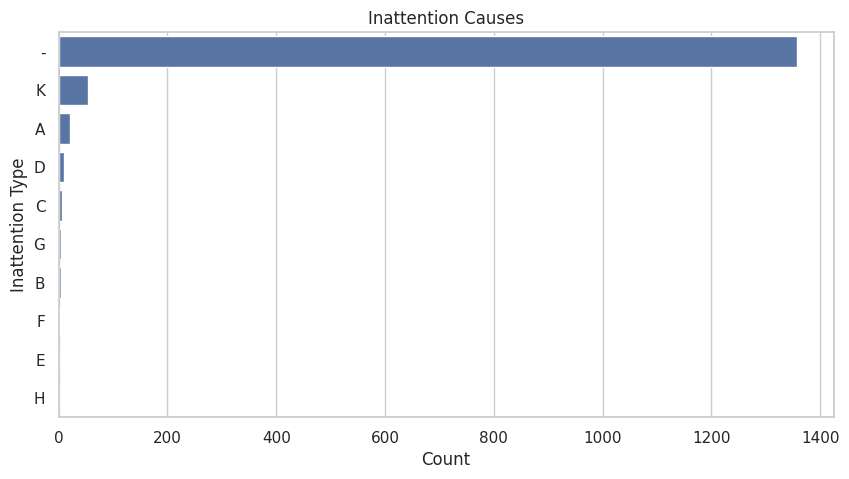

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Set plot style
sns.set(style="whitegrid")

# 1. Party Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="PARTY_TYPE", data=df, order=df['PARTY_TYPE'].value_counts().index)
plt.title("Party Type Distribution")
plt.xlabel("Party Type (1=Driver, 2=Pedestrian,3=Parked Vehicle, 4=Bicyclist,5=Other.)")
plt.ylabel("Count")
plt.show()

# 2. At Fault by Party Type
plt.figure(figsize=(8, 5))
sns.countplot(x="PARTY_TYPE", hue="AT_FAULT", data=df)
plt.title("At-Fault Distribution by Party Type")
plt.xlabel("Party Type")
plt.ylabel("Count")
plt.legend(title="At Fault")
plt.show()

# 3. Age Distribution (excluding unknowns)
plt.figure(figsize=(10, 5))
df_age = df[(df["PARTY_AGE"] < 998)]  # remove unknown age
sns.histplot(df_age["PARTY_AGE"], bins=30, kde=True)
plt.title("Party Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 4. Sex by Party Type
plt.figure(figsize=(8, 5))
sns.countplot(x="PARTY_SEX", hue="PARTY_TYPE", data=df)
plt.title("Sex by Party Type")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Party Type")
plt.show()

# 5. Sobriety State
plt.figure(figsize=(10, 5))
sns.countplot(y="PARTY_SOBRIETY", data=df, order=df["PARTY_SOBRIETY"].value_counts().index)
plt.title("Sobriety Status of Parties")
plt.xlabel("Count")
plt.ylabel("Sobriety Code")
plt.show()

# 6. Drug/Physical Impairment
plt.figure(figsize=(10, 5))
sns.countplot(y="PARTY_DRUG_PHYSICAL", data=df, order=df["PARTY_DRUG_PHYSICAL"].value_counts().index)
plt.title("Drug/Physical Condition")
plt.xlabel("Count")
plt.ylabel("Condition Code")
plt.show()

# 7. Race Distribution
plt.figure(figsize=(7, 4))
sns.countplot(x="RACE", data=df, order=df["RACE"].value_counts().index)
plt.title("Party Race Distribution")
plt.xlabel("Race Code")
plt.ylabel("Count")
plt.show()

# 8. Inattention Types
plt.figure(figsize=(10, 5))
sns.countplot(y="INATTENTION", data=df, order=df["INATTENTION"].value_counts().index)
plt.title("Inattention Causes")
plt.xlabel("Count")
plt.ylabel("Inattention Type")
plt.show()


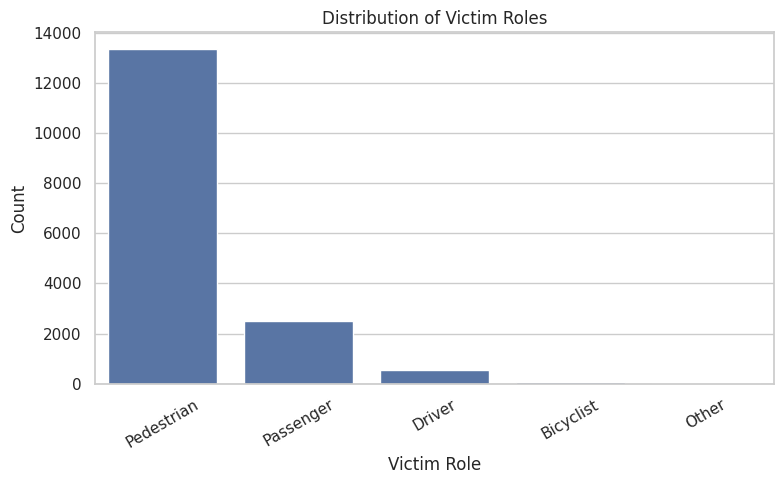

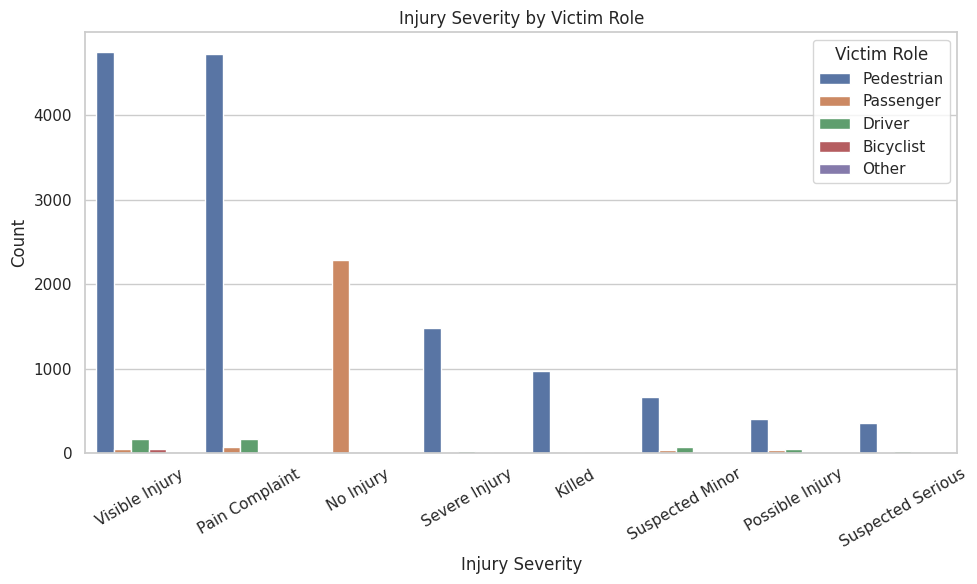

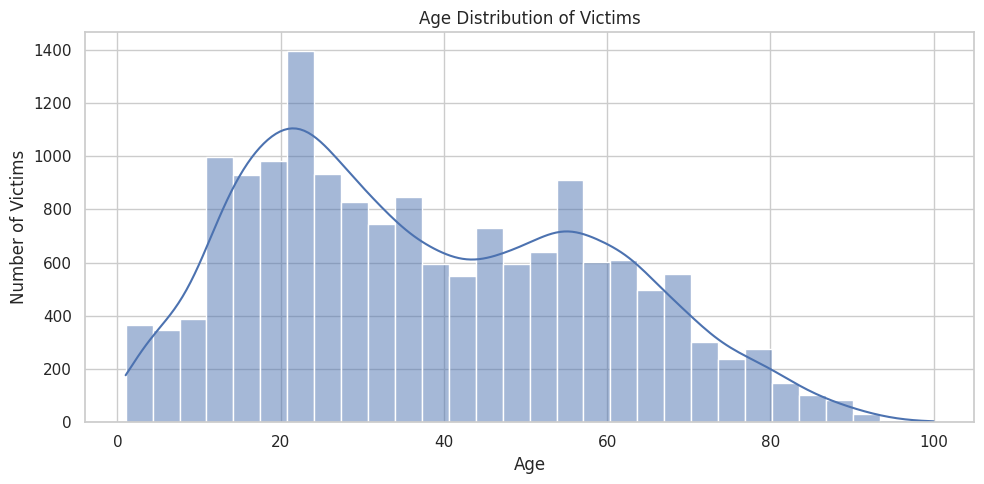

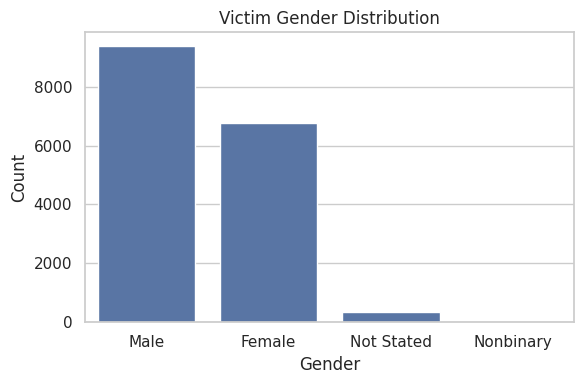

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load victim-level dataset
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Victims.csv")

sns.set(style="whitegrid")

# === 1. Victim Role Distribution ===
role_map = {
    1: "Driver", 2: "Passenger", 3: "Pedestrian",
    4: "Bicyclist", 5: "Other", 6: "Non-Injured Party"
}
df["Victim Role Label"] = df["VICTIM_ROLE"].map(role_map)

plt.figure(figsize=(8, 5))
sns.countplot(x="Victim Role Label", data=df, order=df["Victim Role Label"].value_counts().index)
plt.title("Distribution of Victim Roles")
plt.xlabel("Victim Role")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# === 2. Injury Severity by Victim Role ===
injury_map = {
    1: "Killed", 2: "Severe Injury", 3: "Visible Injury", 4: "Pain Complaint",
    5: "Suspected Serious", 6: "Suspected Minor", 7: "Possible Injury", 0: "No Injury"
}
df["Injury Label"] = df["VICTIM_DEGREE_OF_INJURY"].map(injury_map)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Injury Label", hue="Victim Role Label",
              order=df["Injury Label"].value_counts().index)
plt.title("Injury Severity by Victim Role")
plt.xlabel("Injury Severity")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Victim Role")
plt.tight_layout()
plt.show()

# === 3. Victim Age Distribution ===
df_age = df[(df["VICTIM_AGE"] > 0) & (df["VICTIM_AGE"] < 125)]

plt.figure(figsize=(10, 5))
sns.histplot(data=df_age, x="VICTIM_AGE", bins=30, kde=True)
plt.title("Age Distribution of Victims")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.tight_layout()
plt.show()

# === 4. Victim Sex Distribution ===
sex_map = {"M": "Male", "F": "Female", "X": "Nonbinary", "-": "Not Stated"}
df["Victim Sex Label"] = df["VICTIM_SEX"].map(sex_map)

plt.figure(figsize=(6, 4))
sns.countplot(x="Victim Sex Label", data=df, order=df["Victim Sex Label"].value_counts().index)
plt.title("Victim Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()





<ipython-input-29-0e669712bd99>:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Injury Severity")


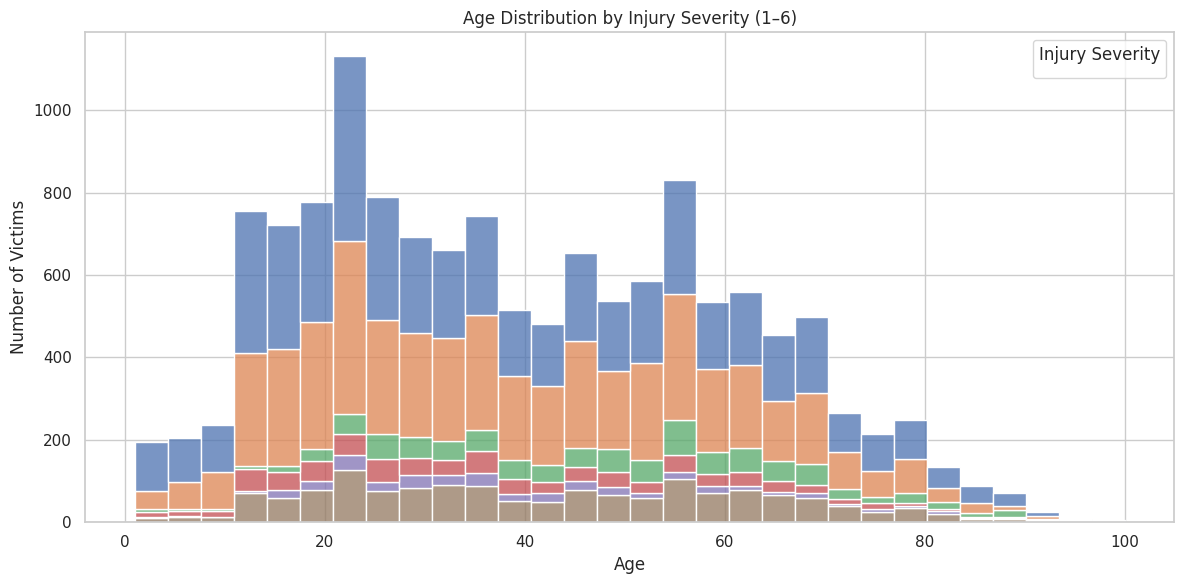

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Victims.csv")

# Filter valid severity (1–6) and valid age
df_filtered = df[df["VICTIM_DEGREE_OF_INJURY"].isin([1, 2, 3, 4, 5, 6])]
df_filtered = df_filtered[(df_filtered["VICTIM_AGE"] > 0) & (df_filtered["VICTIM_AGE"] < 125)]

# Map severity to labels
injury_map = {
    1: "Killed",
    2: "Severe Injury",
    3: "Visible Injury",
    4: "Pain Complaint",
    5: "Suspected Serious",
    6: "Suspected Minor"
}
df_filtered["Injury Severity"] = df_filtered["VICTIM_DEGREE_OF_INJURY"].map(injury_map)

# Plot: Age distribution by injury severity
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_filtered,
    x="VICTIM_AGE",
    hue="Injury Severity",
    multiple="stack",
    bins=30
)
plt.title("Age Distribution by Injury Severity (1–6)")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.legend(title="Injury Severity")
plt.tight_layout()
plt.show()


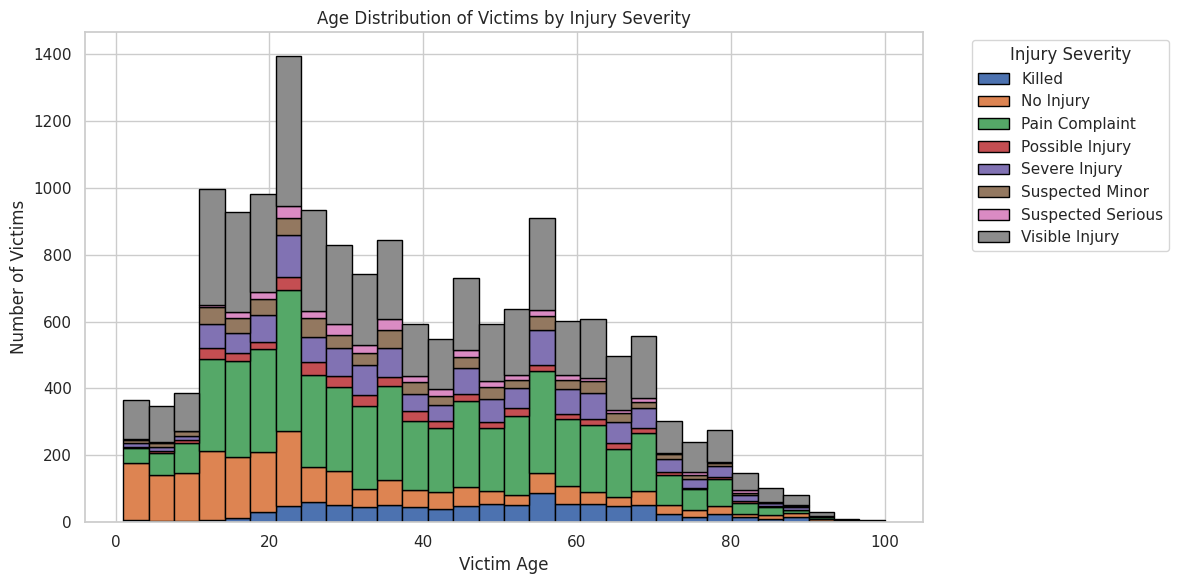

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Victims.csv")

# Filter valid ages
df = df[(df["VICTIM_AGE"] > 0) & (df["VICTIM_AGE"] < 125)]

# Map injury codes to labels
injury_map = {
    0: "No Injury",
    1: "Killed",
    2: "Severe Injury",
    3: "Visible Injury",
    4: "Pain Complaint",
    5: "Suspected Serious",
    6: "Suspected Minor",
    7: "Possible Injury",
    0: "No Injury"
}
df["Injury Severity"] = df["VICTIM_DEGREE_OF_INJURY"].map(injury_map)

# Drop missing or irrelevant injury labels
df = df[df["Injury Severity"].isin([
    "No Injury", "Killed", "Severe Injury", "Visible Injury",
    "Pain Complaint", "Suspected Serious", "Suspected Minor", "Possible Injury"
])]

# Group ages by injury type
severity_groups = df.groupby("Injury Severity")["VICTIM_AGE"].apply(list)

# Plot stacked histogram
plt.figure(figsize=(12, 6))
plt.hist(
    severity_groups.tolist(),
    bins=30,
    stacked=True,
    label=severity_groups.index,
    edgecolor='black'
)
plt.title("Age Distribution of Victims by Injury Severity")
plt.xlabel("Victim Age")
plt.ylabel("Number of Victims")
plt.legend(title="Injury Severity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load party-level data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Standardize race values
race_map = {
    "A": "Asian", "B": "Black", "H": "Hispanic",
    "O": "Other", "W": "White", "-": "Not Stated", "": "Not Stated"
}
df["RACE"] = df["RACE"].fillna("-").astype(str).str.strip()
df["Race Label"] = df["RACE"].map(race_map).fillna("Not Stated")

# Filter to Drivers and Pedestrians
party_type_map = {1: "Driver", 2: "Pedestrian"}
df["Party Role"] = df["PARTY_TYPE"].map(party_type_map)
df = df[df["Party Role"].notna()]  # Keep only 1 (Driver) and 2 (Pedestrian)

# Standardize AT_FAULT
df["AT_FAULT"] = df["AT_FAULT"].fillna("-").astype(str).str.strip().str.upper()

# Group and count
grouped = df[df["AT_FAULT"].isin(["Y", "N"])].groupby(["Race Label", "Party Role", "AT_FAULT"]).size().unstack("AT_FAULT", fill_value=0)
grouped = grouped.rename(columns={"Y": "At Fault", "N": "Not At Fault"})

# Plot: side-by-side bars by race
for role in grouped.index.get_level_values(1).unique():
    role_data = grouped.loc[grouped.index.get_level_values(1) == role]
    role_data = role_data.reset_index(level=1, drop=True)

    ax = role_data.plot(kind="bar", figsize=(10, 6), title=f"{role}: At-Fault vs Not-At-Fault by Race", edgecolor='black')
    ax.set_xlabel("Race")
    ax.set_ylabel("Number of Parties")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


In [38]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Clean and map RACE
race_map = {
    "A": "Asian", "B": "Black", "H": "Hispanic",
    "O": "Other", "W": "White", "": "Not Stated"
}
df["RACE"] = df["RACE"].fillna("").astype(str).str.strip()
df["Race Label"] = df["RACE"].map(race_map).fillna("Not Stated")

# Clean and map PARTY_TYPE
party_type_map = {1: "Driver", 2: "Pedestrian"}
df["Party Role"] = df["PARTY_TYPE"].map(party_type_map)

# Clean AT_FAULT
df["AT_FAULT"] = df["AT_FAULT"].fillna("").astype(str).str.strip().str.upper()

# Filter to relevant roles and fault values
df = df[df["Party Role"].isin(["Driver", "Pedestrian"])]
df = df[df["AT_FAULT"].isin(["Y", "N"])]

# === Function to run chi-square test ===
def run_chi2_test(data, role):
    subset = data[data["Party Role"] == role]
    ct = pd.crosstab(subset["Race Label"], subset["AT_FAULT"])
    if ct.empty or ct.shape[1] < 2:
        print(f"⚠️ Not enough data for {role} to perform chi-square test.\n")
        return
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"=== Chi-Square Test for {role}s ===")
    print(ct)
    print(f"\nChi2 = {chi2:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print(f"👉 Significant racial difference in at-fault status for {role.lower()}s.\n")
    else:
        print(f"✅ No significant racial difference in at-fault status for {role.lower()}s.\n")

# Run tests
run_chi2_test(df, "Driver")
run_chi2_test(df, "Pedestrian")




⚠️ Not enough data for Driver to perform chi-square test.

⚠️ Not enough data for Pedestrian to perform chi-square test.



In [39]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Print all column names
print("Variable names in Ped_Parties.csv:")
for col in df.columns:
    print(col)


Variable names in Ped_Parties.csv:
CASE_ID
PARTY_NUMBER
PARTY_TYPE
AT_FAULT
PARTY_SEX
PARTY_AGE
PARTY_SOBRIETY
PARTY_DRUG_PHYSICAL
DIR_OF_TRAVEL
PARTY_SAFETY_EQUIP_1
PARTY_SAFETY_EQUIP_2
FINAN_RESPONS
SP_INFO_1
SP_INFO_2
SP_INFO_3
OAF_VIOLATION_CODE
OAF_VIOL_CAT
OAF_VIOL_SECTION
OAF_VIOLATION_SUFFIX
OAF_1
OAF_2
PARTY_NUMBER_KILLED
PARTY_NUMBER_INJURED
MOVE_PRE_ACC
VEHICLE_YEAR
VEHICLE_MAKE
STWD_VEHICLE_TYPE
CHP_VEH_TYPE_TOWING
CHP_VEH_TYPE_TOWED
RACE
INATTENTION
SPECIAL_INFO_F
SPECIAL_INFO_G
ACCIDENT_YEAR


In [43]:
import pandas as pd
from scipy.stats import chi2_contingency

# === Step 1: Load and clean data ===
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Map RACE codes to labels
race_map = {
    "A": "Asian", "B": "Black", "H": "Hispanic",
    "O": "Other", "W": "White", "": "Not Stated"
}
df["RACE"] = df["RACE"].fillna("").astype(str).str.strip()
df["Race Label"] = df["RACE"].map(race_map).fillna("Not Stated")

# Map PARTY_TYPE to roles (NOTE: PARTY_TYPE is a string here!)
party_type_map = {
    '1': "Driver",
    '2': "Pedestrian"
}
df["PARTY_TYPE"] = df["PARTY_TYPE"].astype(str).str.strip()
df["Party Role"] = df["PARTY_TYPE"].map(party_type_map)

# Standardize AT_FAULT
df["AT_FAULT"] = df["AT_FAULT"].fillna("").astype(str).str.strip().str.upper()

# Keep only rows with valid role and fault values
df = df[df["Party Role"].notna()]
df = df[df["AT_FAULT"].isin(["Y", "N"])]

# === Step 2: Define function to run chi-square test ===
def run_race_chi2_analysis(data, role_name):
    subset = data[data["Party Role"] == role_name]
    crosstab = pd.crosstab(subset["Race Label"], subset["AT_FAULT"])

    if crosstab.empty or crosstab.shape[1] < 2:
        print(f"⚠️ Not enough data for {role_name} to run chi-square test.\n")
        return

    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"\n=== {role_name.upper()} ===")
    print("Observed counts (Race vs. At-Fault Status):")
    print(crosstab)
    print(f"\nChi-square statistic: {chi2:.2f}")
    print(f"Degrees of freedom: {dof}")
    print(f"P-value: {p:.4f}")
    if p < 0.05:
        print(f"👉 Significant racial difference in at-fault status for {role_name.lower()}s.\n")
    else:
        print(f"✅ No significant racial difference in at-fault status for {role_name.lower()}s.\n")

# === Step 3: Run analysis for Drivers and Pedestrians ===
run_race_chi2_analysis(df, "Driver")
run_race_chi2_analysis(df, "Pedestrian")



=== DRIVER ===
Observed counts (Race vs. At-Fault Status):
AT_FAULT       N     Y
Race Label            
Asian        322   342
Black        538   524
Hispanic    1801  1831
Not Stated   988  1537
Other        239   263
White       2205  2437

Chi-square statistic: 79.18
Degrees of freedom: 5
P-value: 0.0000
👉 Significant racial difference in at-fault status for drivers.


=== PEDESTRIAN ===
Observed counts (Race vs. At-Fault Status):
AT_FAULT       N     Y
Race Label            
Asian        425   141
Black        950   668
Hispanic    3289  1651
Not Stated   518   219
Other        286   152
White       3206  2041

Chi-square statistic: 96.20
Degrees of freedom: 5
P-value: 0.0000
👉 Significant racial difference in at-fault status for pedestrians.



In [44]:
import pandas as pd

# Load and clean data
df = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Clean RACE
race_map = {
    "A": "Asian", "B": "Black", "H": "Hispanic",
    "O": "Other", "W": "White", "": "Not Stated"
}
df["RACE"] = df["RACE"].fillna("").astype(str).str.strip()
df["Race Label"] = df["RACE"].map(race_map).fillna("Not Stated")

# Clean PARTY_TYPE
party_type_map = {'1': "Driver", '2': "Pedestrian"}
df["PARTY_TYPE"] = df["PARTY_TYPE"].astype(str).str.strip()
df["Party Role"] = df["PARTY_TYPE"].map(party_type_map)

# Clean AT_FAULT
df["AT_FAULT"] = df["AT_FAULT"].fillna("").astype(str).str.strip().str.upper()
df = df[df["AT_FAULT"].isin(["Y", "N"])]
df = df[df["Party Role"].notna()]

# Function to calculate % at fault
def get_fault_percent_by_race(role):
    subset = df[df["Party Role"] == role]
    counts = pd.crosstab(subset["Race Label"], subset["AT_FAULT"])
    counts["Total"] = counts.sum(axis=1)
    counts["% At Fault"] = round(counts["Y"] / counts["Total"] * 100, 1)
    return counts[["Y", "N", "Total", "% At Fault"]].sort_values(by="% At Fault", ascending=False)

# Run for both roles
print("=== Drivers: % At-Fault by Race ===")
print(get_fault_percent_by_race("Driver"))

print("\n=== Pedestrians: % At-Fault by Race ===")
print(get_fault_percent_by_race("Pedestrian"))


=== Drivers: % At-Fault by Race ===
AT_FAULT       Y     N  Total  % At Fault
Race Label                               
Not Stated  1537   988   2525        60.9
White       2437  2205   4642        52.5
Other        263   239    502        52.4
Asian        342   322    664        51.5
Hispanic    1831  1801   3632        50.4
Black        524   538   1062        49.3

=== Pedestrians: % At-Fault by Race ===
AT_FAULT       Y     N  Total  % At Fault
Race Label                               
Black        668   950   1618        41.3
White       2041  3206   5247        38.9
Other        152   286    438        34.7
Hispanic    1651  3289   4940        33.4
Not Stated   219   518    737        29.7
Asian        141   425    566        24.9
